In [ ]:
!nvidia-smi

Mon Apr  8 00:52:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 148.0ms
Speed: 2.3ms preprocess, 148.0ms inference, 556.1ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


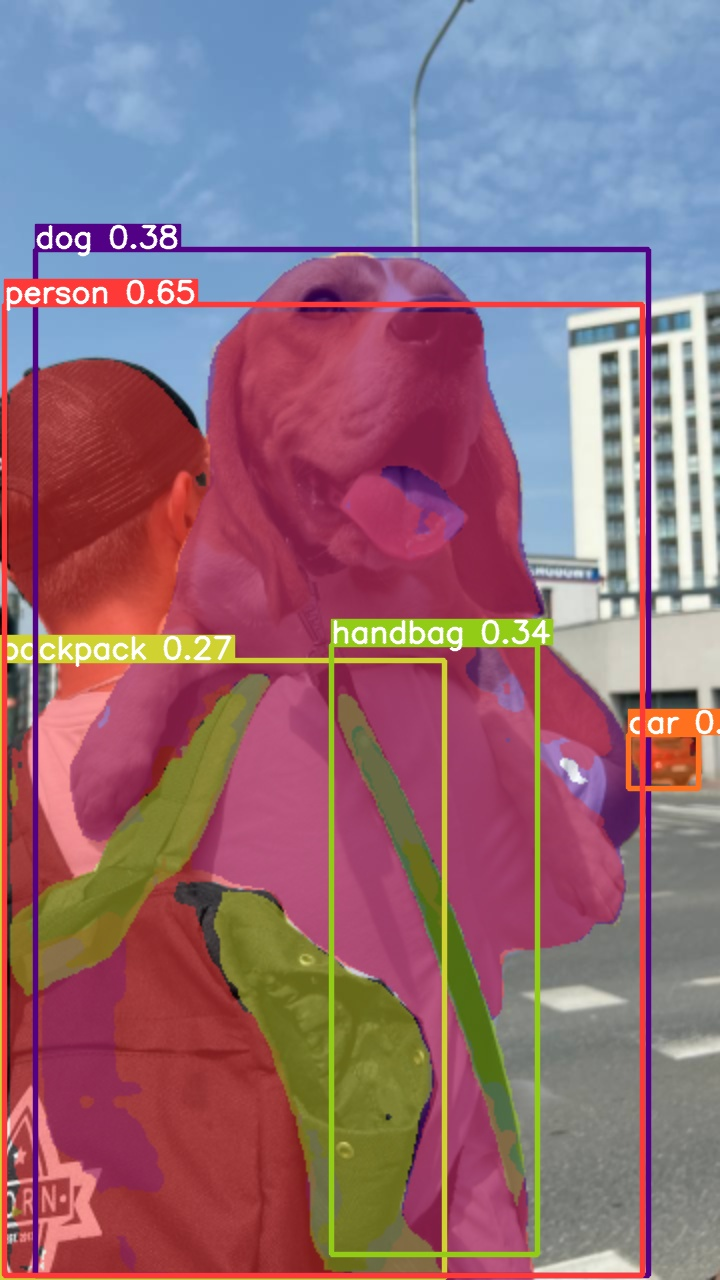

In [ ]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

In [ ]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 133.0ms
Speed: 2.6ms preprocess, 133.0ms inference, 501.7ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[4.4446e+00, 3.0434e+02, 6.4261e+02, 1.2755e+03],
        [6.2834e+02, 7.3451e+02, 6.9819e+02, 7.8832e+02],
        [3.5369e+01, 2.4992e+02, 6.4884e+02, 1.2759e+03],
        [3.3150e+02, 6.4431e+02, 5.3794e+02, 1.2545e+03],
        [8.8925e-01, 6.6045e+02, 4.4417e+02, 1.2785e+03]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.6489, 0.5239, 0.3784, 0.3442, 0.2668], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0.,  2., 16., 26., 24.], device='cuda:0')

In [ ]:
results[0].masks.masks

AttributeError: 'Masks' object has no attribute 'masks'. See valid attributes below.

    A class for storing and manipulating detection masks.

    Attributes:
        xy (list): A list of segments in pixel coordinates.
        xyn (list): A list of normalized segments.

    Methods:
        cpu(): Returns the masks tensor on CPU memory.
        numpy(): Returns the masks tensor as a numpy array.
        cuda(): Returns the masks tensor on GPU memory.
        to(device, dtype): Returns the masks tensor with the specified device and dtype.
    

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet
from roboflow import Roboflow
rf = Roboflow(api_key="p0sR7IZXtNC13CK6nyXa")
project = rf.workspace("zahiazineb").project("pl_diseases")
version = project.version(1)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pl_diseases-1 in yolov8:: 100%|██████████| 11218/11218 [00:02<00:00, 4013.46it/s]


In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

/content
New https://pypi.org/project/ultralytics/8.1.45 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/pl_diseases-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visual

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					    labels.jpg	      train_batch2.jpg
BoxF1_curve.png					    MaskF1_curve.png  val_batch0_labels.jpg
BoxP_curve.png					    MaskP_curve.png   val_batch0_pred.jpg
BoxPR_curve.png					    MaskPR_curve.png  val_batch1_labels.jpg
BoxR_curve.png					    MaskR_curve.png   val_batch1_pred.jpg
confusion_matrix_normalized.png			    results.csv       val_batch2_labels.jpg
confusion_matrix.png				    results.png       val_batch2_pred.jpg
events.out.tfevents.1712538982.350fbd7fec66.6280.0  train_batch0.jpg  weights
labels_correlogram.jpg				    train_batch1.jpg


/content


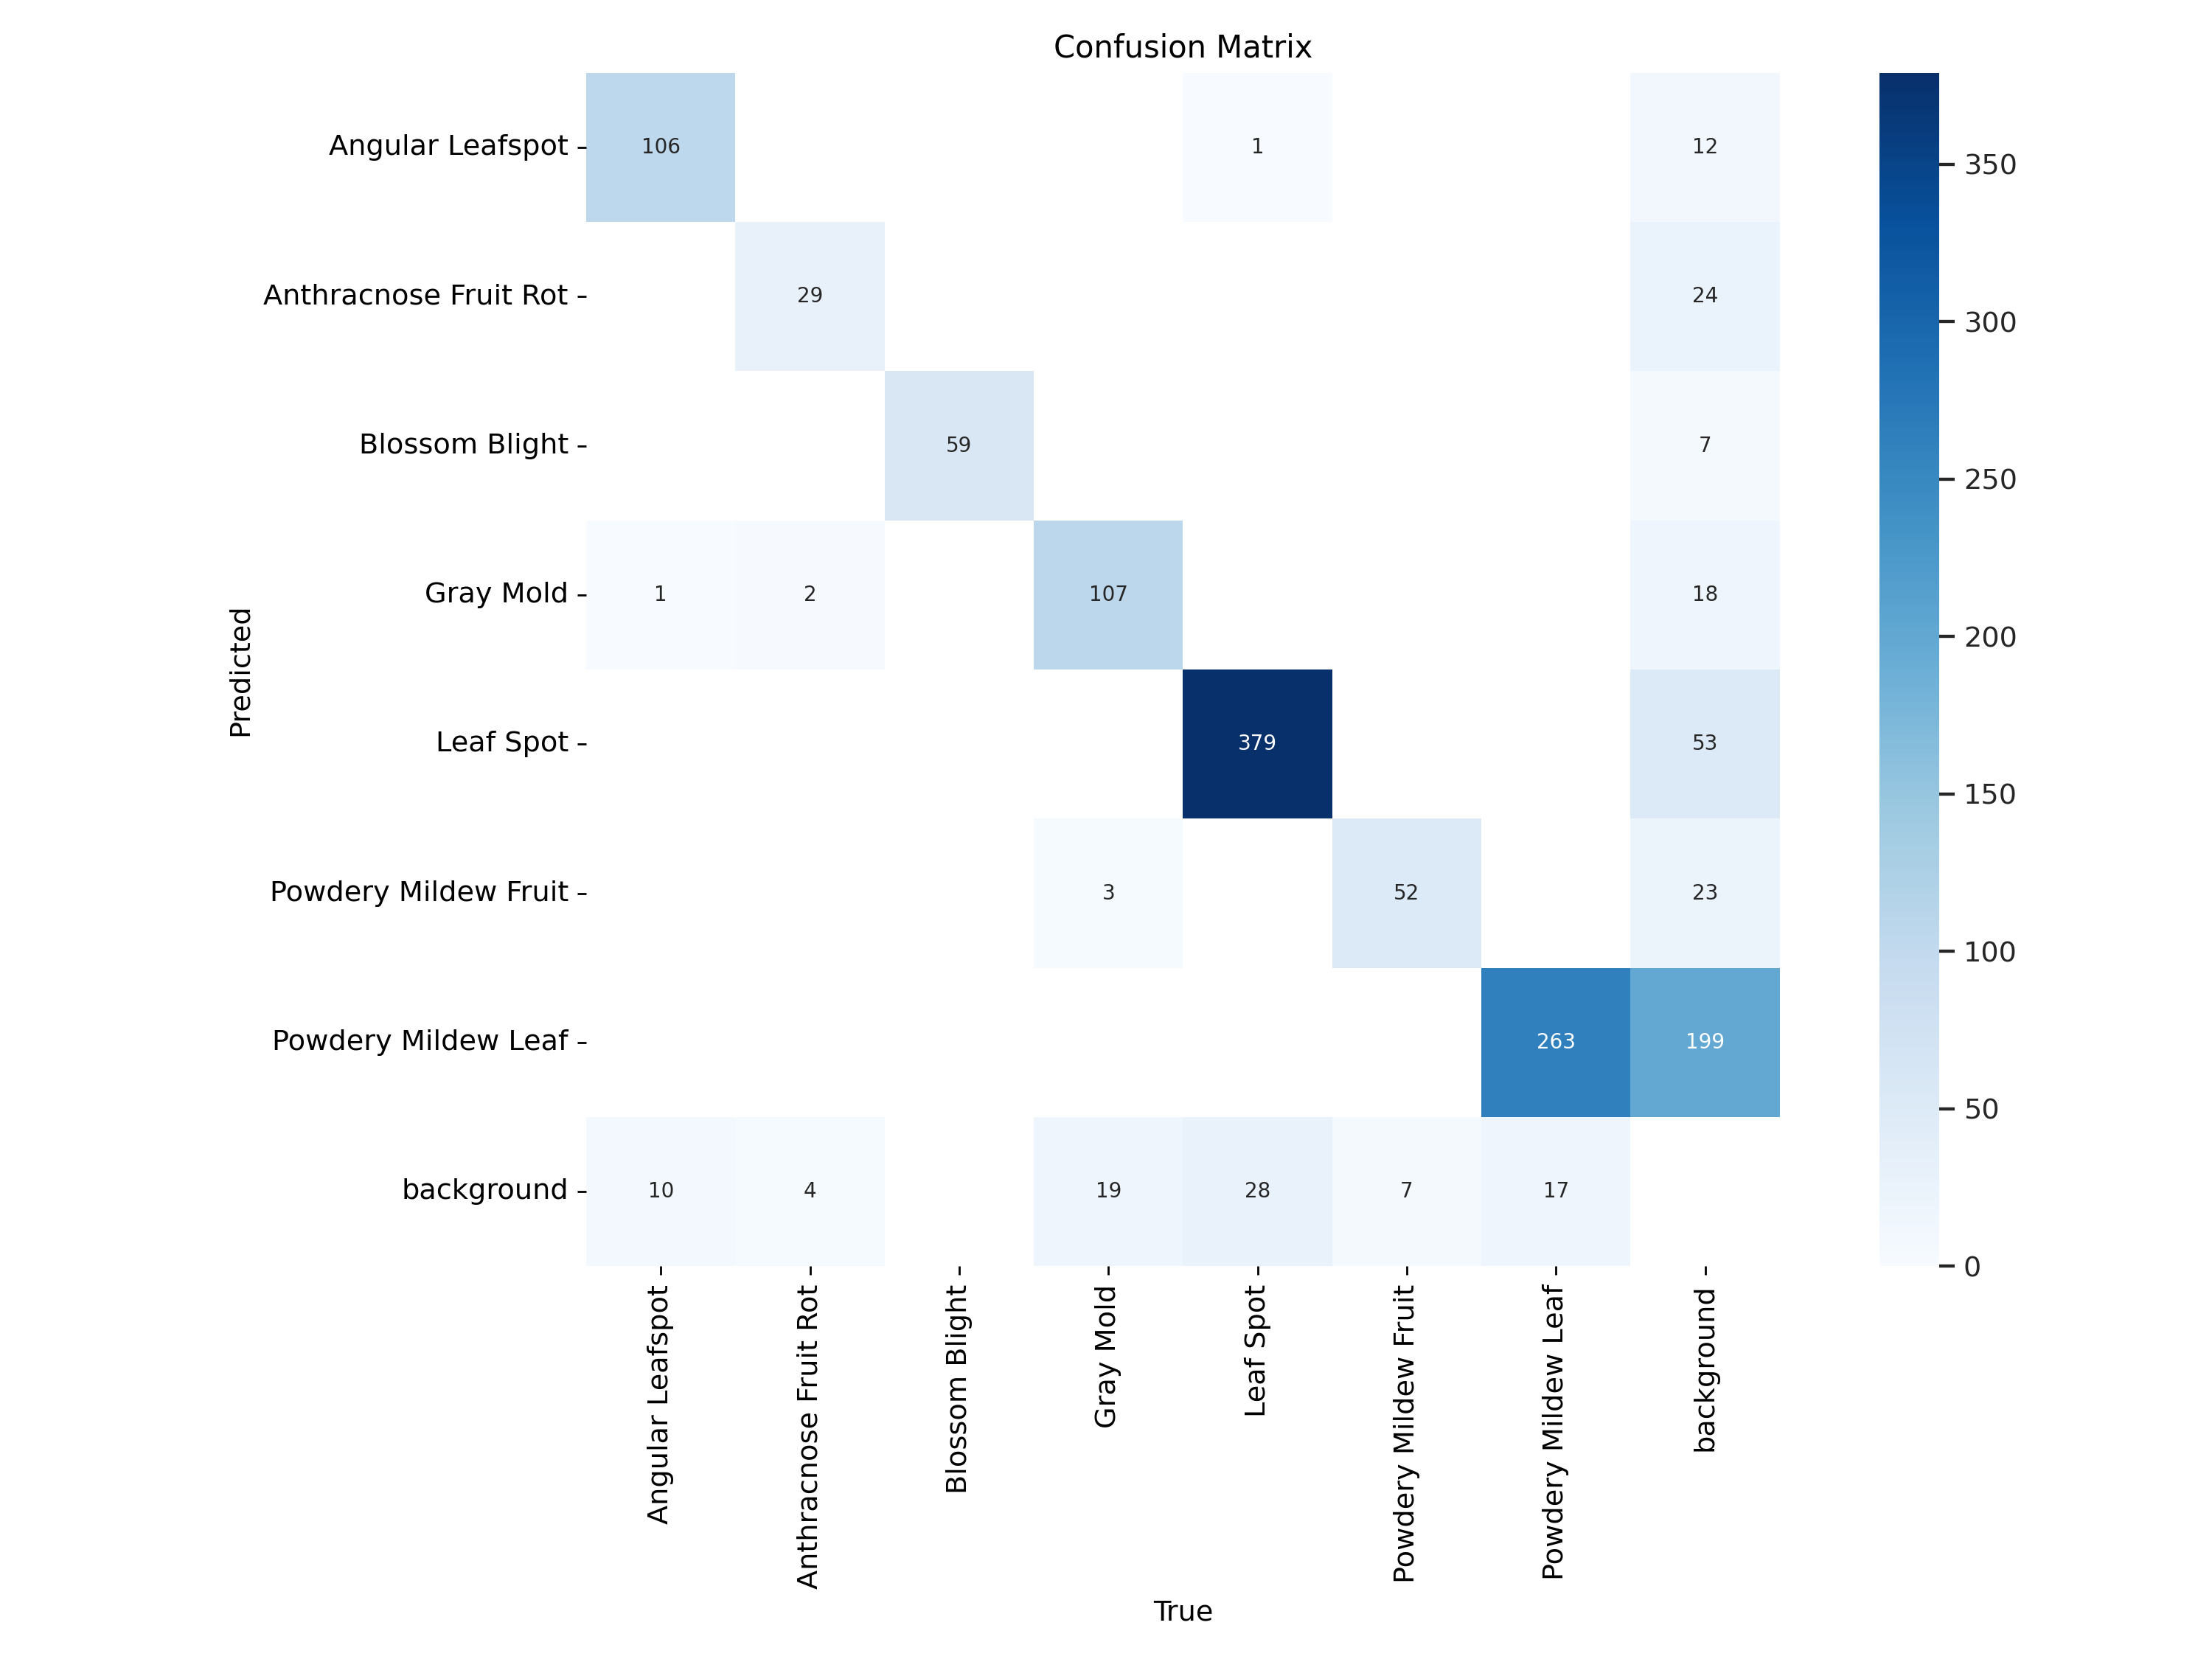

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


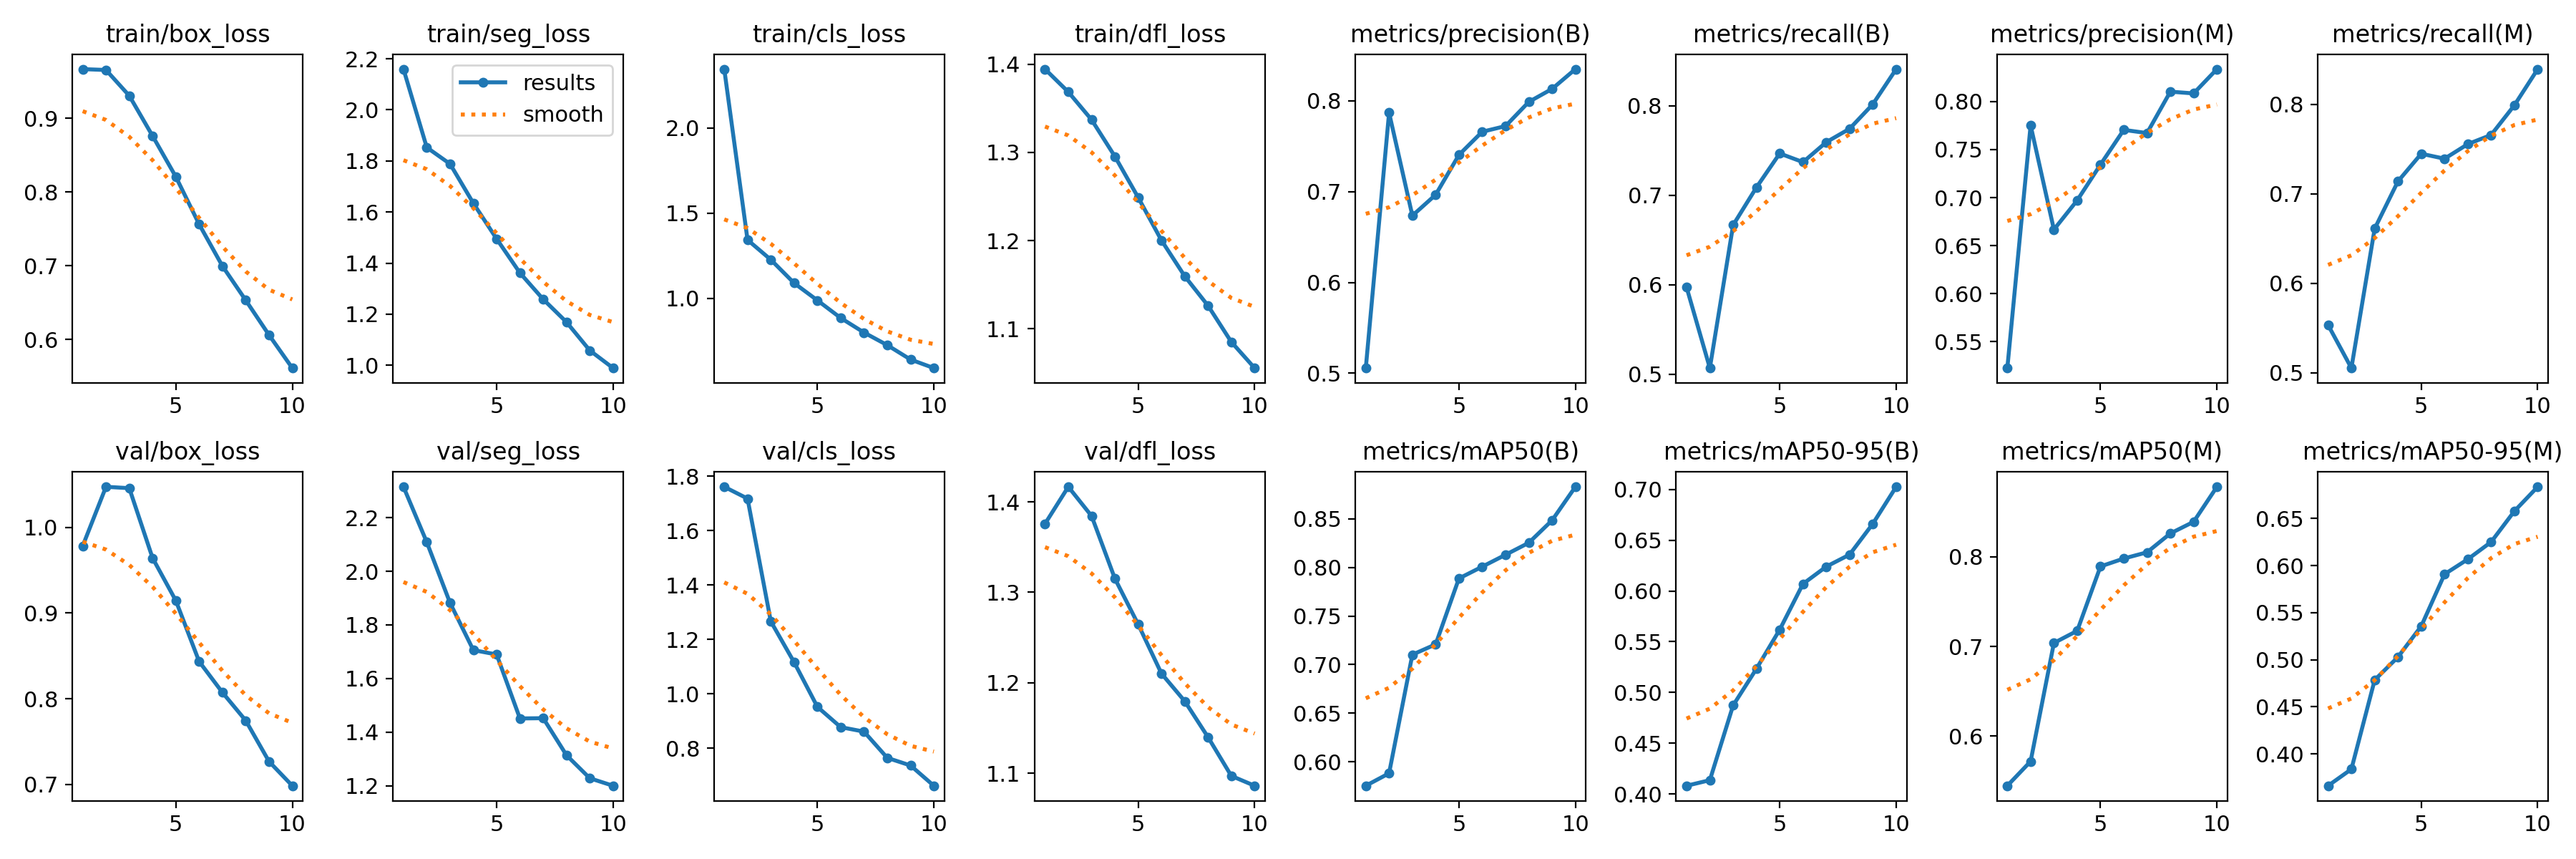

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


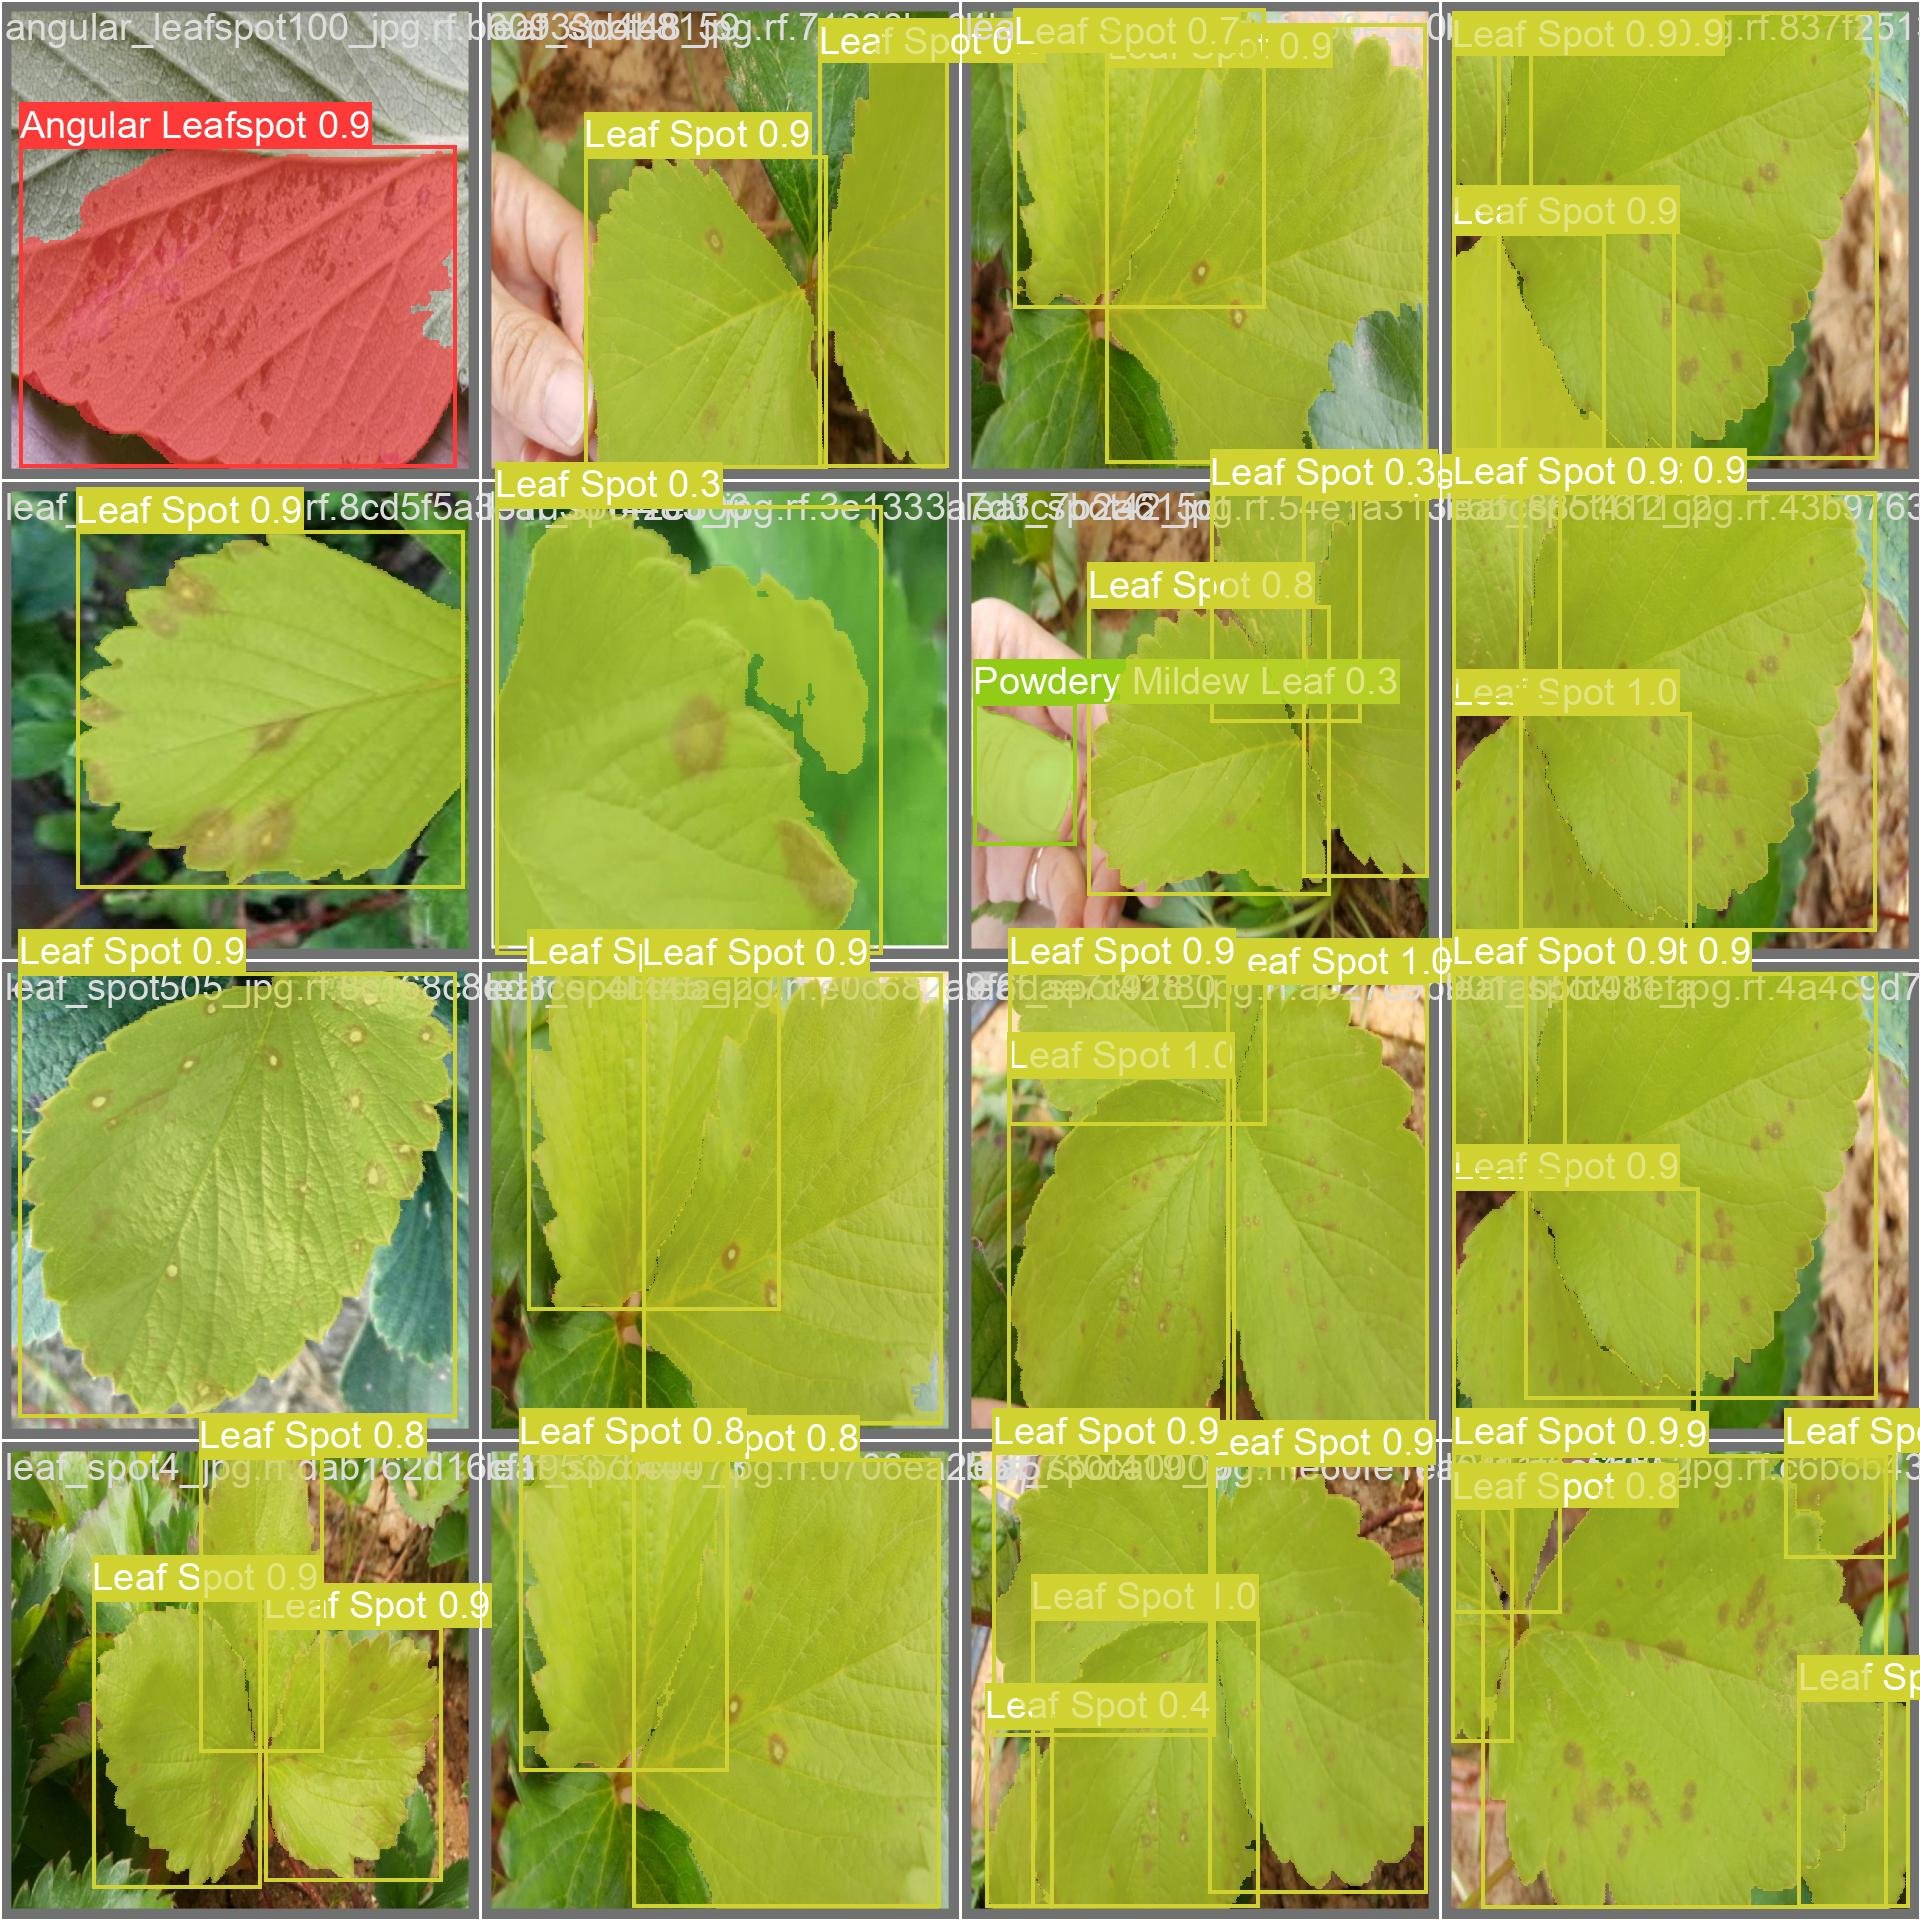

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11782309 parameters, 0 gradients, 42.5 GFLOPs
val: Scanning /content/datasets/pl_diseases-1/valid/labels.cache... 495 images, 0 backgrounds, 0 corrupt: 100% 495/495 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 31/31 [00:17<00:00,  1.82it/s]
                   all        495       1087      0.835      0.841      0.883      0.702      0.834      0.839      0.878      0.684
      Angular Leafspot        495        117      0.936      0.869      0.937      0.717      0.908      0.844      0.896      0.653
 Anthracnose Fruit Rot        495         35      0.646      0.714      0.762      0.456      0.646      0.714      0.755      0.451
        Blossom Blight        495         59        0.9          1      0.947       0.82        0.9          1 

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11782309 parameters, 0 gradients, 42.5 GFLOPs

image 1/247 /content/datasets/pl_diseases-1/test/images/angular_leafspot109_jpg.rf.aaba12a7d44088f417febfb2e0f8507a.jpg: 640x640 1 Angular Leafspot, 21.1ms
image 2/247 /content/datasets/pl_diseases-1/test/images/angular_leafspot113_jpg.rf.80fff962497e1eda52d32812cb3089f5.jpg: 640x640 1 Angular Leafspot, 21.0ms
image 3/247 /content/datasets/pl_diseases-1/test/images/angular_leafspot152_jpg.rf.3cf10d56182d1d303093be4c4e2b7b39.jpg: 640x640 1 Angular Leafspot, 21.0ms
image 4/247 /content/datasets/pl_diseases-1/test/images/angular_leafspot17_jpg.rf.3cda33a321279a8cecc09a4ac7076e31.jpg: 640x640 2 Angular Leafspots, 21.0ms
image 5/247 /content/datasets/pl_diseases-1/test/images/angular_leafspot181_jpg.rf.81ef2a40254113176c3da496fdb99bd8.jpg: 640x640 4 Angular Leafspots, 20.9ms
image 6/247 /content/datasets/pl_d

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8-seg", model_path=f"{HOME}/runs/segment/train/")

View the status of your deployment at: https://app.roboflow.com/zahiazineb/pl_diseases/1
Share your model with the world at: https://universe.roboflow.com/zahiazineb/pl_diseases/model/1
